# Fashion MNIST Classifcation

**Download required libraires and dependencies**

In [1]:
#@ Downloading required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
!pip install visualkeras --quiet
import visualkeras
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 992 kB 37.2 MB/s 


**Download the dataset**

In [2]:
#@ Downloading the dataset
tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#@ looking shape of the data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [5]:
y_train[1]

0

In [6]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

'''
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

'\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n'

(-0.5, 27.5, 27.5, -0.5)

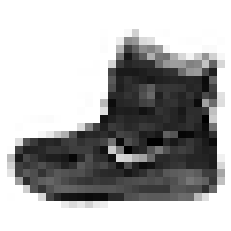

In [7]:
#@ Plotting the image
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

In [8]:
y_test[0]

9

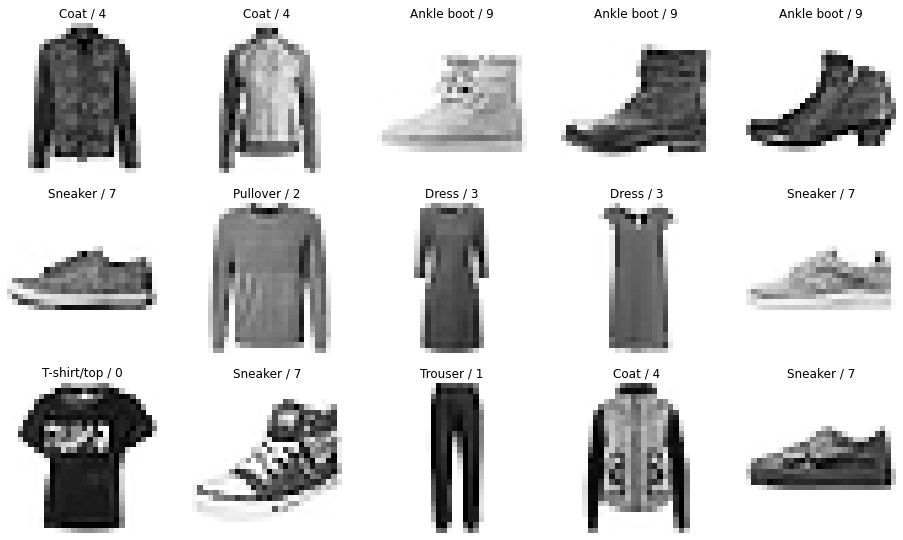

In [9]:
#@ Plotting images randomly
plt.figure(figsize=(16,16))

j=1

for i in np.random.randint(0, 1000, 15):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  # plt.axis('off') # off the axis
  plt.title('{} / {}'.format(labels[y_train[i]], y_train[i]))
  plt.axis('off')
 

In [10]:
#@ Change the dimension of the data
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
#@ Applying feature scaling in the dataset
X_train = X_train/255
X_test = X_test/255

In [12]:
#@ Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

#@ Looking shape after applying train/test in the dataset
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


**Building Convolutional Neural Network**

In [13]:
#@ Model Building using Convolutional Neural Network
model = keras.models.Sequential([
                                keras.layers.Conv2D(filters=32, kernel_size=3, 
                                                    strides=(1,1), 
                                                    padding='valid', 
                                                    activation='relu', 
                                                    input_shape=[28,28,1]),
                                keras.layers.MaxPool2D(pool_size=(2,2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(units=128, activation='relu'),
                                keras.layers.Dense(units=10, activation='softmax')
])
#@ Getting summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

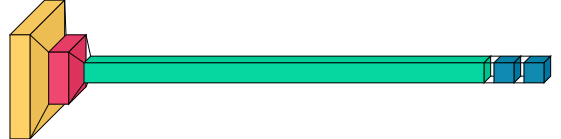

In [14]:
#CNN Visualization
visualkeras.layered_view(model)

In [15]:
#@ Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#@ Training the CNN model
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 10s 18ms/step - loss: 0.6435 - accuracy: 0.7781 - val_loss: 0.4467 - val_accuracy: 0.8429
Epoch 2/10
94/94 [==============================] - 1s 12ms/step - loss: 0.4045 - accuracy: 0.8590 - val_loss: 0.3813 - val_accuracy: 0.8662
Epoch 3/10
94/94 [==============================] - 1s 12ms/step - loss: 0.3556 - accuracy: 0.8762 - val_loss: 0.3408 - val_accuracy: 0.8806
Epoch 4/10
94/94 [==============================] - 1s 12ms/step - loss: 0.3181 - accuracy: 0.8891 - val_loss: 0.3269 - val_accuracy: 0.8846
Epoch 5/10
94/94 [==============================] - 1s 12ms/step - loss: 0.2951 - accuracy: 0.8958 - val_loss: 0.3037 - val_accuracy: 0.8954
Epoch 6/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2759 - accuracy: 0.9021 - val_loss: 0.2921 - val_accuracy: 0.8989
Epoch 7/10
94/94 [==============================] - 1s 11ms/step - loss: 0.2596 - accuracy: 0.9073 - val_loss: 0.2843 - val_accuracy: 0.8998
Epoch 8/10
9

**Testing and Evauating the Model**

In [17]:
#@ Testing the model
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

1/1 [==============================] - 0s 21ms/step


9

In [18]:
# checking
y_test[0]

9

In [19]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.97, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.06, 0.12, 0.  ]], dtype=float32)

In [20]:
#@ Evaluating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3007 - accuracy: 0.8926


[0.3006705939769745, 0.8925999999046326]

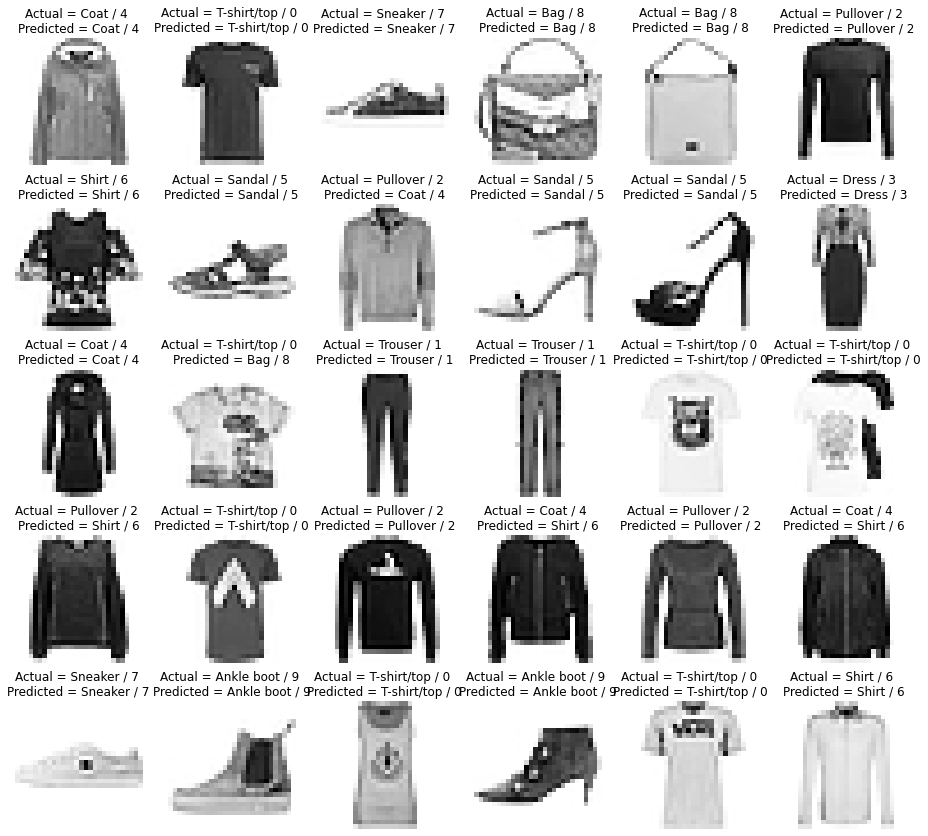

In [21]:
#@ Visualizing the output
plt.figure(figsize=(16,30))

j = 1

for i in np.random.randint(0, 1000, 30):
  plt.subplot(10, 6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(labels[y_test[i]], y_test[i], labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

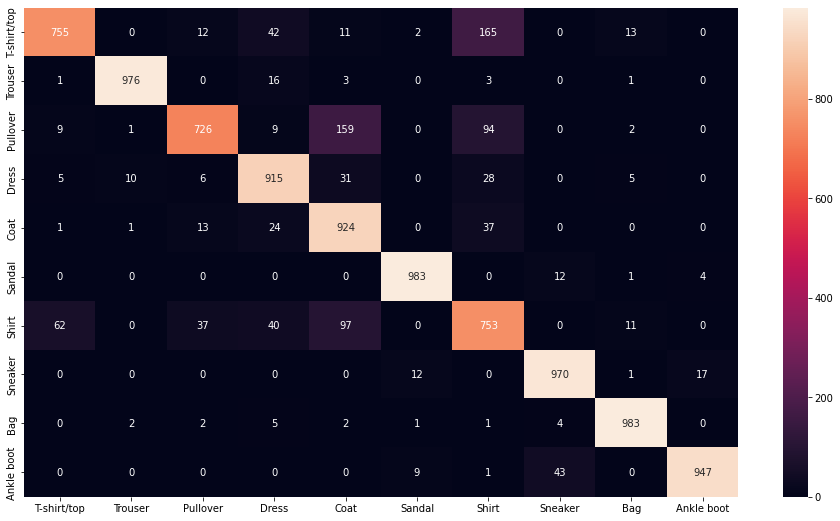

In [22]:
#@ Plotting Confusion Matrix

plt.figure(figsize=(16, 9))
y_pred_labels = [np.argmax(label) for label in y_pred]     # getting value of single label
conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

In [23]:
#@ Getting Precision Value
cr = classification_report(y_test, y_pred_labels, target_names=labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.76      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.91      0.73      0.81      1000
       Dress       0.87      0.92      0.89      1000
        Coat       0.75      0.92      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.70      0.75      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



**Building Complex Model**

In [24]:
#@ Building complex model now

model2 = keras.models.Sequential([
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
                                keras.layers.MaxPool2D(pool_size=(2,2)),
                                keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=[28,28,1]),
                                keras.layers.MaxPool2D(pool_size=(2,2)),
                                keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu', input_shape=[28,28,1]),
                                keras.layers.MaxPool2D(pool_size=(2,2)),
                                keras.layers.Flatten(),
                                keras.layers.Dense(units=128, activation='relu'),
                                keras.layers.Dropout(0.25),
                                keras.layers.Dense(units=256, activation='relu'),
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(units=256, activation='relu'),
                                keras.layers.Dropout(0.25),
                                keras.layers.Dense(units=128, activation='relu'),
                                keras.layers.Dropout(0.10),
                                keras.layers.Dense(units=10, activation='softmax')
])

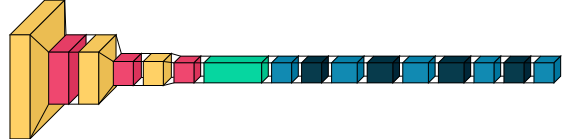

In [25]:
#@ Visualize CNN Model
visualkeras.layered_view(model2)

In [26]:
#@ Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#@ Train the model
model2.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
94/94 [==============================] - 4s 32ms/step - loss: 1.0703 - accuracy: 0.5835 - val_loss: 0.5588 - val_accuracy: 0.7798
Epoch 2/10
94/94 [==============================] - 2s 26ms/step - loss: 0.5583 - accuracy: 0.7903 - val_loss: 0.4368 - val_accuracy: 0.8312
Epoch 3/10
94/94 [==============================] - 2s 25ms/step - loss: 0.4464 - accuracy: 0.8382 - val_loss: 0.3704 - val_accuracy: 0.8628
Epoch 4/10
94/94 [==============================] - 2s 26ms/step - loss: 0.3770 - accuracy: 0.8657 - val_loss: 0.3191 - val_accuracy: 0.8834
Epoch 5/10
94/94 [==============================] - 2s 26ms/step - loss: 0.3359 - accuracy: 0.8799 - val_loss: 0.2924 - val_accuracy: 0.8945
Epoch 6/10
94/94 [==============================] - 2s 26ms/step - loss: 0.3045 - accuracy: 0.8912 - val_loss: 0.2970 - val_accuracy: 0.8909
Epoch 7/10
94/94 [==============================] - 2s 26ms/step - loss: 0.2818 - accuracy: 0.8999 - val_loss: 0.2548 - val_accuracy: 0.9070
Epoch 8/10
94

In [27]:
#@ Evaluating the model
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.9047


[0.2739510238170624, 0.904699981212616]

**Save Model**

In [28]:
#@ Saving the model
model.save('FashionMNIST_CNN_Model.h5')

**END**